In [82]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_log_error, mean_squared_error, confusion_matrix, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
 
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data = pd.read_csv('data/churn.csv')
data_test = pd.read_csv('data/churn_test.csv')
data_train = pd.read_csv('data/churn_train.csv')

In [25]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
avg_dist,3.67,8.26,0.77,2.36,3.13,10.56,3.95,2.04,4.36,2.37,...,3.38,1.06,7.58,2.53,2.25,5.63,0,3.86,4.58,3.49
avg_rating_by_driver,5,5,5,4.9,4.9,5,4,5,5,5,...,5,5,5,4.7,4.5,4.2,4,5,3.5,5
avg_rating_of_driver,4.7,5,4.3,4.6,4.4,3.5,NaN,5,4.5,NaN,...,4.7,5,1,4.8,4.6,5,NaN,5,3,NaN
avg_surge,1.1,1,1,1.14,1.19,1,1,1,1,1,...,1.08,1.25,1,1.11,1.44,1,1,1,1,1
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell,Winterfell,Astapor,Winterfell,Winterfell,Winterfell,...,Astapor,Winterfell,King's Landing,Astapor,Astapor,King's Landing,Astapor,Winterfell,Astapor,Astapor
last_trip_date,2014-06-17,2014-05-05,2014-01-07,2014-06-29,2014-03-15,2014-06-06,2014-01-25,2014-01-29,2014-02-01,2014-01-05,...,2014-05-18,2014-06-29,2014-01-19,2014-07-01,2014-05-31,2014-06-05,2014-01-25,2014-05-22,2014-01-15,2014-04-20
phone,iPhone,Android,iPhone,iPhone,Android,iPhone,Android,iPhone,Android,Android,...,iPhone,iPhone,iPhone,iPhone,iPhone,iPhone,iPhone,Android,iPhone,Android
signup_date,2014-01-25,2014-01-29,2014-01-06,2014-01-10,2014-01-27,2014-01-09,2014-01-24,2014-01-28,2014-01-21,2014-01-03,...,2014-01-13,2014-01-08,2014-01-18,2014-01-03,2014-01-03,2014-01-25,2014-01-24,2014-01-31,2014-01-14,2014-01-18
surge_pct,15.4,0,0,20,11.8,0,0,0,0,0,...,33.3,100,0,11.1,37.5,0,0,0,0,0
trips_in_first_30_days,4,0,3,9,14,2,1,2,2,1,...,1,0,1,3,1,0,1,0,2,0


# Data cleaning pipeline:

- date to datetime
- remove NA


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                50000 non-null  float64
 1   avg_rating_by_driver    49799 non-null  float64
 2   avg_rating_of_driver    41878 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   city                    50000 non-null  object 
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   signup_date             50000 non-null  object 
 8   surge_pct               50000 non-null  float64
 9   trips_in_first_30_days  50000 non-null  int64  
 10  luxury_car_user         50000 non-null  int64  
 11  weekday_pct             50000 non-null  float64
 12  last_trip               50000 non-null  object 
 13  churn                   50000 non-null  int64  
dtypes: float64(6), int64(3), object(5)
mem

In [26]:
date = '06-01-2014'
data['last_trip'] = pd.to_datetime(data.last_trip_date)
data['last_trip'] = data['last_trip'].dt.date
data['churn'] = (data.last_trip < date)*1
data['signup_date'] = pd.to_datetime(data.signup_date)
data['signup_date'] = data['signup_date'].dt.date
data['luxury_car_user'] = data.luxury_car_user*1

In [30]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   avg_dist                41445 non-null  float64
 1   avg_rating_by_driver    41445 non-null  float64
 2   avg_rating_of_driver    41445 non-null  float64
 3   avg_surge               41445 non-null  float64
 4   city                    41445 non-null  object 
 5   last_trip_date          41445 non-null  object 
 6   phone                   41445 non-null  object 
 7   signup_date             41445 non-null  object 
 8   surge_pct               41445 non-null  float64
 9   trips_in_first_30_days  41445 non-null  int64  
 10  luxury_car_user         41445 non-null  int64  
 11  weekday_pct             41445 non-null  float64
 12  last_trip               41445 non-null  object 
 13  churn                   41445 non-null  int64  
dtypes: float64(6), int64(3), object(5)
mem

In [31]:
data.city.value_counts()

Winterfell        19161
Astapor           13509
King's Landing     8775
Name: city, dtype: int64

In [41]:
data.luxury_car_user.value_counts()

0    25526
1    15919
Name: luxury_car_user, dtype: int64

In [33]:
data.phone.value_counts()

iPhone     29352
Android    12093
Name: phone, dtype: int64

In [32]:
data.churn.value_counts()

1    24410
0    17035
Name: churn, dtype: int64

In [40]:
X = data[['avg_dist', 
     'avg_rating_by_driver', 
     'avg_rating_of_driver', 
     'avg_surge', 
     'surge_pct', 
     'trips_in_first_30_days', 
     'weekday_pct']].values
y = data.churn.values

# Simple logistic regression

In [44]:
model = LogisticRegression()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [55]:
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
mean_squared_log_error(y_test, y_hat), mean_squared_error(y_test, y_hat)

(0.18004237145766994, 0.3747346072186836)

In [66]:
r2_score(y_test, y_hat)

-0.5409027572889062

In [51]:
model.coef_

array([[ 0.02760542,  0.10948703,  0.01140204,  0.42584567, -0.00401934,
        -0.11663491, -0.00060319]])

In [52]:
model.intercept_

array([-0.43969221])

In [61]:
tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()
tn, fp, fn, tp

(891, 3435, 448, 5588)

# Looking into other models

In [63]:
rf = RandomForestRegressor(n_estimators=100,
                            n_jobs=-1,
                            random_state=1)

gdbr = GradientBoostingRegressor(learning_rate=0.1,
                                  loss='ls',
                                  n_estimators=100,
                                  random_state=1)

abr = AdaBoostRegressor(DecisionTreeRegressor(),
                         learning_rate=0.1,
                         loss='linear',
                         n_estimators=100,
                         random_state=1)

In [64]:
def cvscore(x, y):
    print('rf', 
          np.mean(cross_val_score(rf, X_train, y_train, scoring='r2', cv=5)), 
          cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()*(-1)
         )
    print('gdbr', 
          np.mean(cross_val_score(gdbr, X_train, y_train, scoring='r2', cv=5)), 
          cross_val_score(gdbr, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()*(-1)
         )
    print('abr', 
          np.mean(cross_val_score(abr, X_train, y_train, scoring='r2', cv=5)), 
          cross_val_score(abr, X_train, y_train, scoring='neg_mean_squared_error', cv=5).mean()*(-1)
         )

In [67]:
cvscore(X, y)

rf 0.16288264809725617 0.20232032255426385
gdbr 0.2608275247284878 0.17864457845790216
abr -0.24434171812719133 0.30073969847641824


In [68]:
def stage_score_plot(estimator, X_train, y_train, X_test, y_test):
    '''
    Parameters: estimator: GradientBoostingRegressor or AdaBoostRegressor
                X_train: 2d numpy array
                y_train: 1d numpy array
                X_test: 2d numpy array
                y_test: 1d numpy array

    Returns: A plot of the number of iterations vs the MSE for the model for
    both the training set and test set.
    '''
    clf = estimator()
    clf.fit(X_train, y_train)
    
    predicts_train = np.array(list(clf.staged_predict(X_train)))
    MSEs_train = (y_train - predicts_train)**2
    MSEs_train = MSEs_train.mean(axis=1)
    
    predicts_test = np.array(list(clf.staged_predict(X_test)))
    MSEs_test = (y_test - predicts_test)**2
    MSEs_test = MSEs_test.mean(axis=1)
    
    x = range(100)
    
    plt.plot(x, MSEs_test)
    plt.plot(x, MSEs_train)
    #plt.legend()

    return MSEs_train, MSEs_test

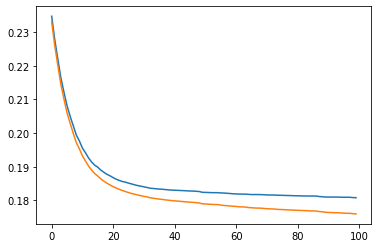

In [69]:
estimator = GradientBoostingRegressor
MSEs_train, MSEs_test = stage_score_plot(estimator, X_train, y_train, X_test, y_test)

# Gradient Booster Regressor


In [71]:
gdbr = GradientBoostingRegressor(learning_rate=0.1,
                                  loss='ls',
                                  n_estimators=100,
                                  random_state=1)

In [77]:
gdbr.fit(X_train, y_train)
y_hat = gdbr.predict(X_test)
mean_squared_error(y_test, y_hat)

0.1808096259218557

In [76]:
gdbr.feature_importances_

array([0.02111597, 0.41667961, 0.02558658, 0.03088397, 0.23730669,
       0.05953113, 0.20889605])

Text(0, 0.5, 'Feature Name')

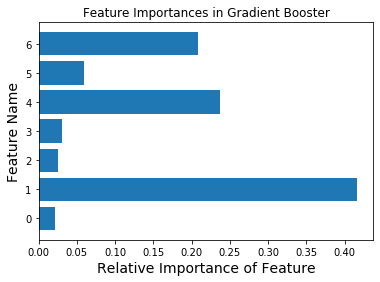

In [81]:
fig, ax = plt.subplots()

feature_importances = gdbr.feature_importances_
feature_names = ['avg_dist', 
     'avg_rating_by_driver', 
     'avg_rating_of_driver', 
     'avg_surge', 
     'surge_pct', 
     'trips_in_first_30_days', 
     'weekday_pct']

width = 0.8

idx = np.arange(len(feature_names))
ax.barh(idx, feature_importances, align='center')
ax.set_yticks(idx, feature_names)


ax.set_title("Feature Importances in Gradient Booster")
ax.set_xlabel('Relative Importance of Feature', fontsize=14)
ax.set_ylabel('Feature Name', fontsize=14)
# plt.savefig('plots/feature-importances.png', bbox_inches='tight')

# Using GradientBoostingClassifier

In [91]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
clf.score(X_test, y_test)

0.7334491410924532

In [89]:
clf.feature_importances_

array([0.02300634, 0.41472877, 0.0255347 , 0.0323991 , 0.23470843,
       0.06236783, 0.20725482])

Text(0, 0.5, 'Feature Name')

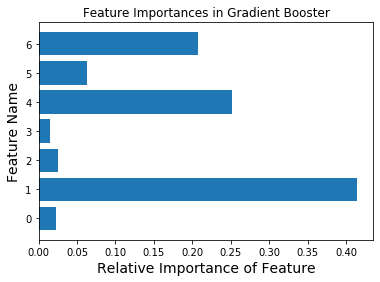

In [87]:
fig, ax = plt.subplots()

feature_importances = clf.feature_importances_
feature_names = ['avg_dist', 
     'avg_rating_by_driver', 
     'avg_rating_of_driver', 
     'avg_surge', 
     'surge_pct', 
     'trips_in_first_30_days', 
     'weekday_pct']

width = 0.8

idx = np.arange(len(feature_names))
ax.barh(idx, feature_importances, align='center')
ax.set_yticks(idx, feature_names)


ax.set_title("Feature Importances in Gradient Booster")
ax.set_xlabel('Relative Importance of Feature', fontsize=14)
ax.set_ylabel('Feature Name', fontsize=14)
# plt.savefig('plots/feature-importances.png', bbox_inches='tight')